# 1. Importation des modules

In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# 2. Importation de la base et première analyse

In [69]:
df = pd.read_csv("data/AmesHousing.csv")

In [70]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [72]:
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# 3. nettoyage de données

## Valeurs maquantes

On supprime les colonnes inutiles ou avec trop de valeurs nulles

In [73]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [74]:
df.shape

(2930, 75)

In [75]:
na_ratios = df.isnull().sum() / len(df)
na_ratios = na_ratios.drop(na_ratios[na_ratios == 0].index).sort_values(ascending = False)
na_ratios = pd.DataFrame({"Missing Proportion": na_ratios})
na_ratios = na_ratios.drop(na_ratios[na_ratios["Missing Proportion"] <0.005].index)
na_ratios

,Missing Proportion
Lot Frontage,0.167235
Garage Yr Blt,0.054266
Garage Qual,0.054266
Garage Finish,0.054266
Garage Cond,0.054266
Garage Type,0.053584
Bsmt Exposure,0.028328
BsmtFin Type 2,0.027645
Bsmt Qual,0.027304
Bsmt Cond,0.027304


# 4. Analyse de données

In [76]:
df.iloc[:,65:]

,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,0,0,0,0,5,2010,WD,Normal,215000
1,0,0,120,0,0,6,2010,WD,Normal,105000
2,0,0,0,0,12500,6,2010,WD,Normal,172000
3,0,0,0,0,0,4,2010,WD,Normal,244000
4,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,3,2006,WD,Normal,142500
2926,0,0,0,0,0,6,2006,WD,Normal,131000
2927,0,0,0,0,700,7,2006,WD,Normal,132000
2928,0,0,0,0,0,4,2006,WD,Normal,170000


In [77]:
cat_col = ['MS SubClass', 'MS Zoning',
        'Street','Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
        'Overall Cond', 'Roof Style',
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
        'Mas Vnr Type', 'Exter Qual',
        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1',  'BsmtFin Type 2', 
        'Heating', 'Heating QC', 'Central Air',
        'Electrical',  'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
        'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
        'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
        'Garage Finish', 'Garage Cars', 
        'Garage Qual', 'Garage Cond', 'Paved Drive',  'Enclosed Porch', '3Ssn Porch',  'Mo Sold',  'Sale Type',
        'Sale Condition']

num_col = ['Lot Frontage', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
        'Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
        'Gr Liv Area','Garage Yr Blt', 'Garage Area','Wood Deck SF',
        'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val','Yr Sold', "Enclosed Porch", "3Ssn Porch",  'SalePrice']

## Analyse des variables quantitatives

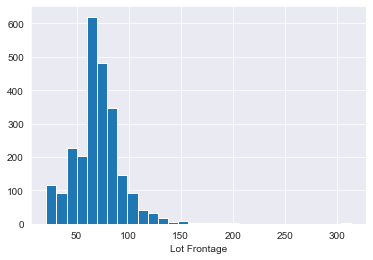

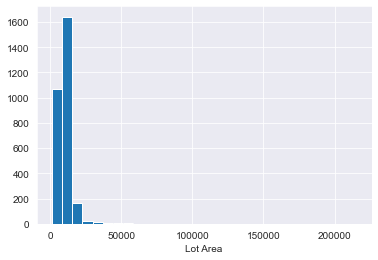

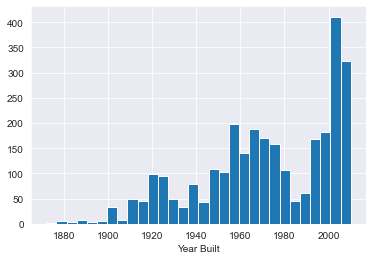

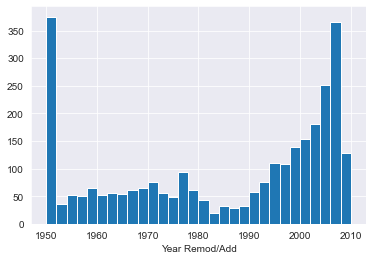

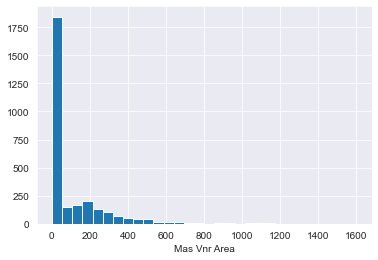

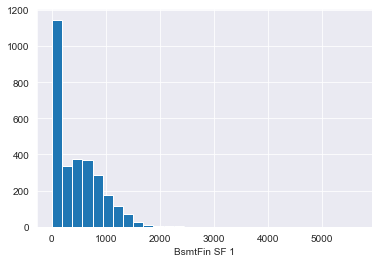

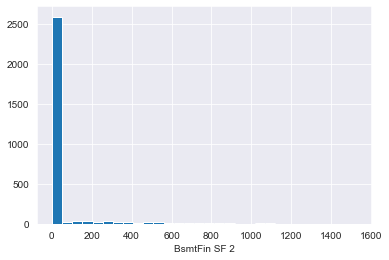

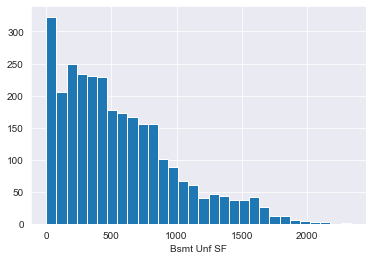

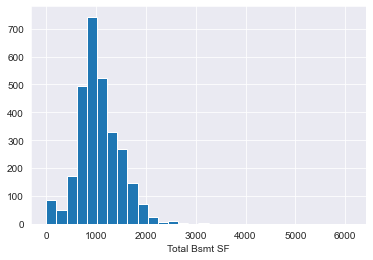

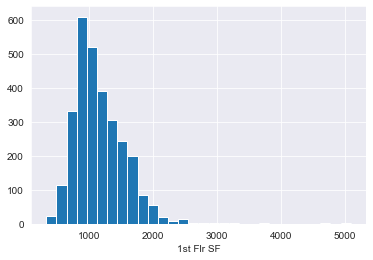

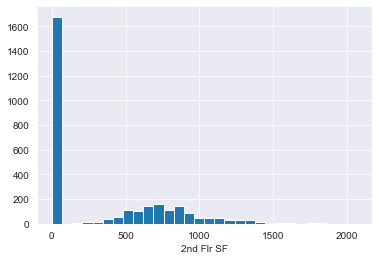

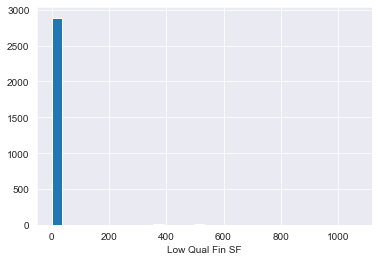

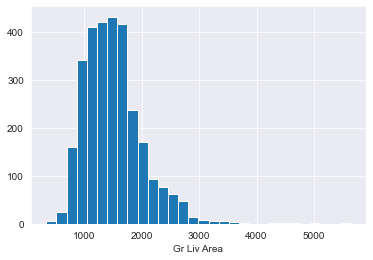

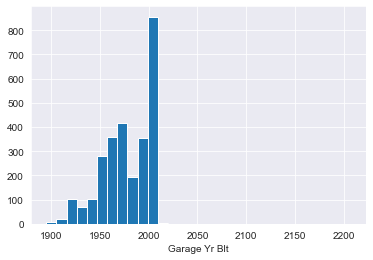

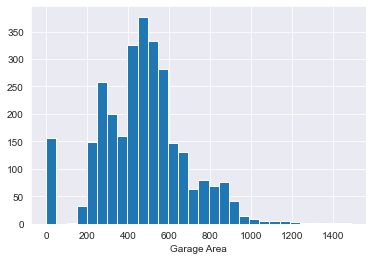

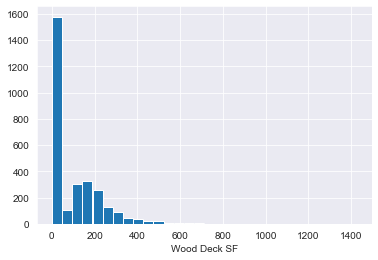

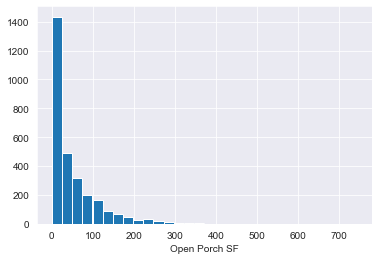

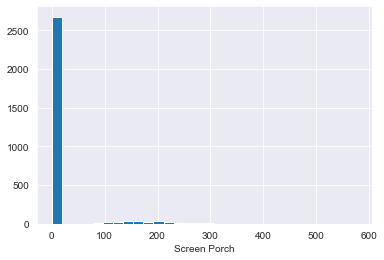

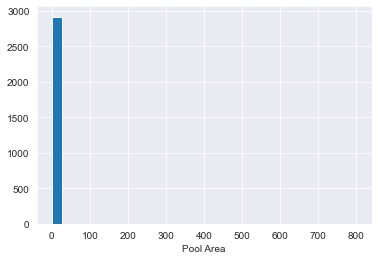

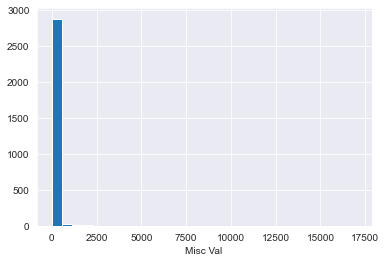

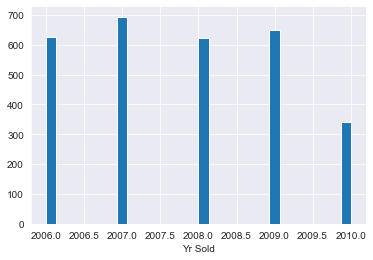

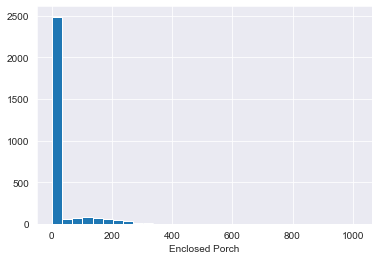

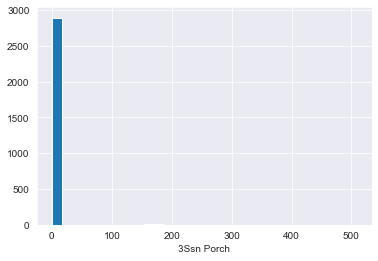

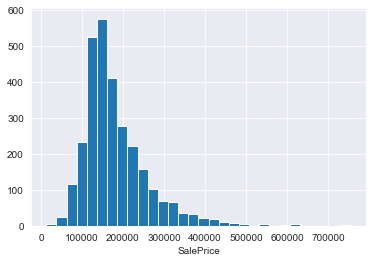

In [78]:
for col in num_col:
    plt.figure()
    plt.hist(x=df[col], bins=30)
    plt.xlabel(col)
    plt.show()

In [79]:
# to_drop = ['BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
#         'Pool Area', 'Misc Val', '3Ssn Porch']

In [80]:
# df= df.drop(to_drop,axis=1)

## Analyse des variables catégorielles

On commence par rechercher les colonnes dont la distribution est la plus déséquilibrée

In [81]:
for col in cat_col:
       print(df[col].value_counts())

20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MS SubClass, dtype: int64
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
Pave    2918
Grvl      12
Name: Street, dtype: int64
Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkS

On peut distinguer:
- les colonnes complétement déséquilibrées (une valeur pèse au moins 95%) : on les supprime
- les colonnes déséquilibrées (une valeur pèse au moins 85%): s'il n'y a pas d'écart significatif entre les moyennes de saleprice pour chaque catégorie, on les supprime également.

In [82]:
highly_unbalanced_col = ["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]

unbalanced_col = ["Land Slope", "Land Contour", "Condition 1", "Bldg Type", "Exter Cond", "Bsmt Cond", 
            "BsmtFin Type 2", "Central Air", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]

In [83]:
df = df.drop(highly_unbalanced_col, axis=1)

In [84]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3S

In [85]:
df[["Land Slope", "SalePrice"]].groupby(by="Land Slope").mean()


,SalePrice
Land Slope,
Gtl,179565.365005
Mod,204853.784000
Sev,207370.625000


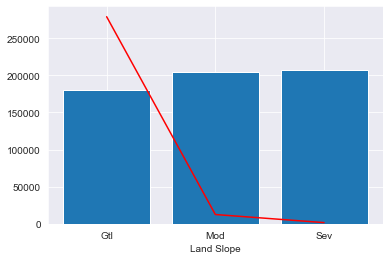

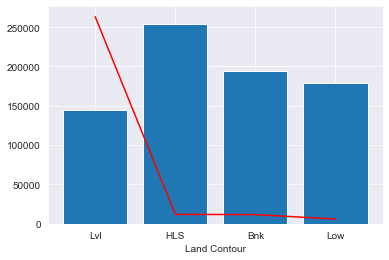

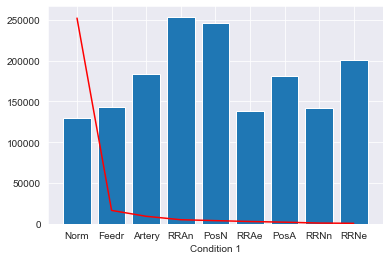

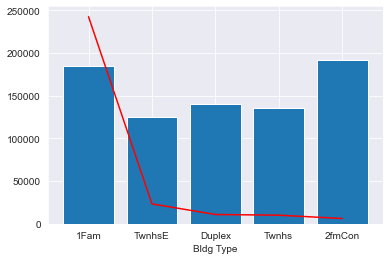

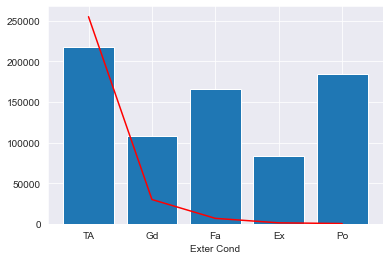

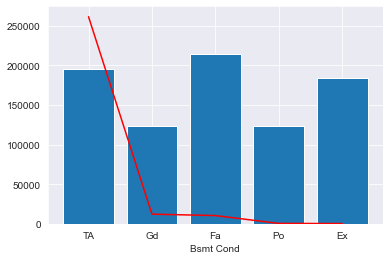

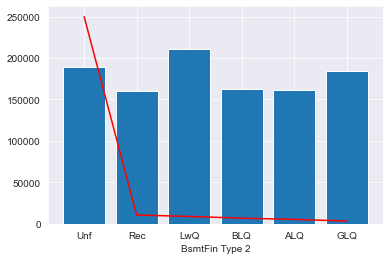

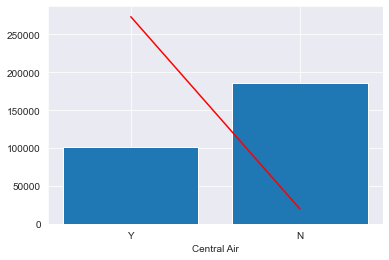

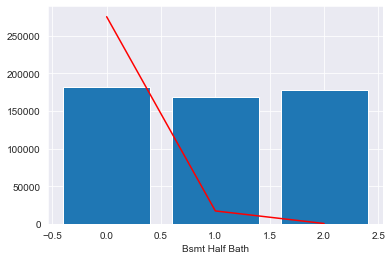

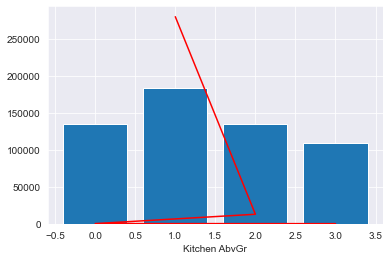

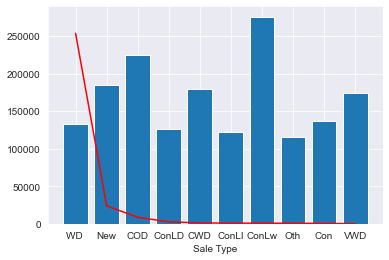

In [86]:
for i,col in enumerate(unbalanced_col,1): 
    plt.figure()
    df_fig = df[[col, "SalePrice"]].groupby(by=col).mean()
    df
    plt.bar(df_fig.index, df_fig.SalePrice)
    df[col].value_counts().apply(lambda x:x*100).plot(kind='line',c="red")
    plt.xlabel(col)
    plt.show()

In [87]:
to_keep = [ "Land Contour", "Bldg Type", "Exter Cond", "Bsmt Cond",  "Central Air"]
# to_drop =  ["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
# df = df.drop(to_drop, axis=1)

In [88]:
["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"]
["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]
['BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch','Pool Area', 'Misc Val', "3Ssn Porch"]

['BsmtFin SF 2',
 'Low Qual Fin SF',
 'Open Porch SF',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 '3Ssn Porch']

## Analyse des corrélations

In [89]:
df.shape

(2930, 67)

In [90]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [91]:
complete_correlation= associations(df,compute_only=True)

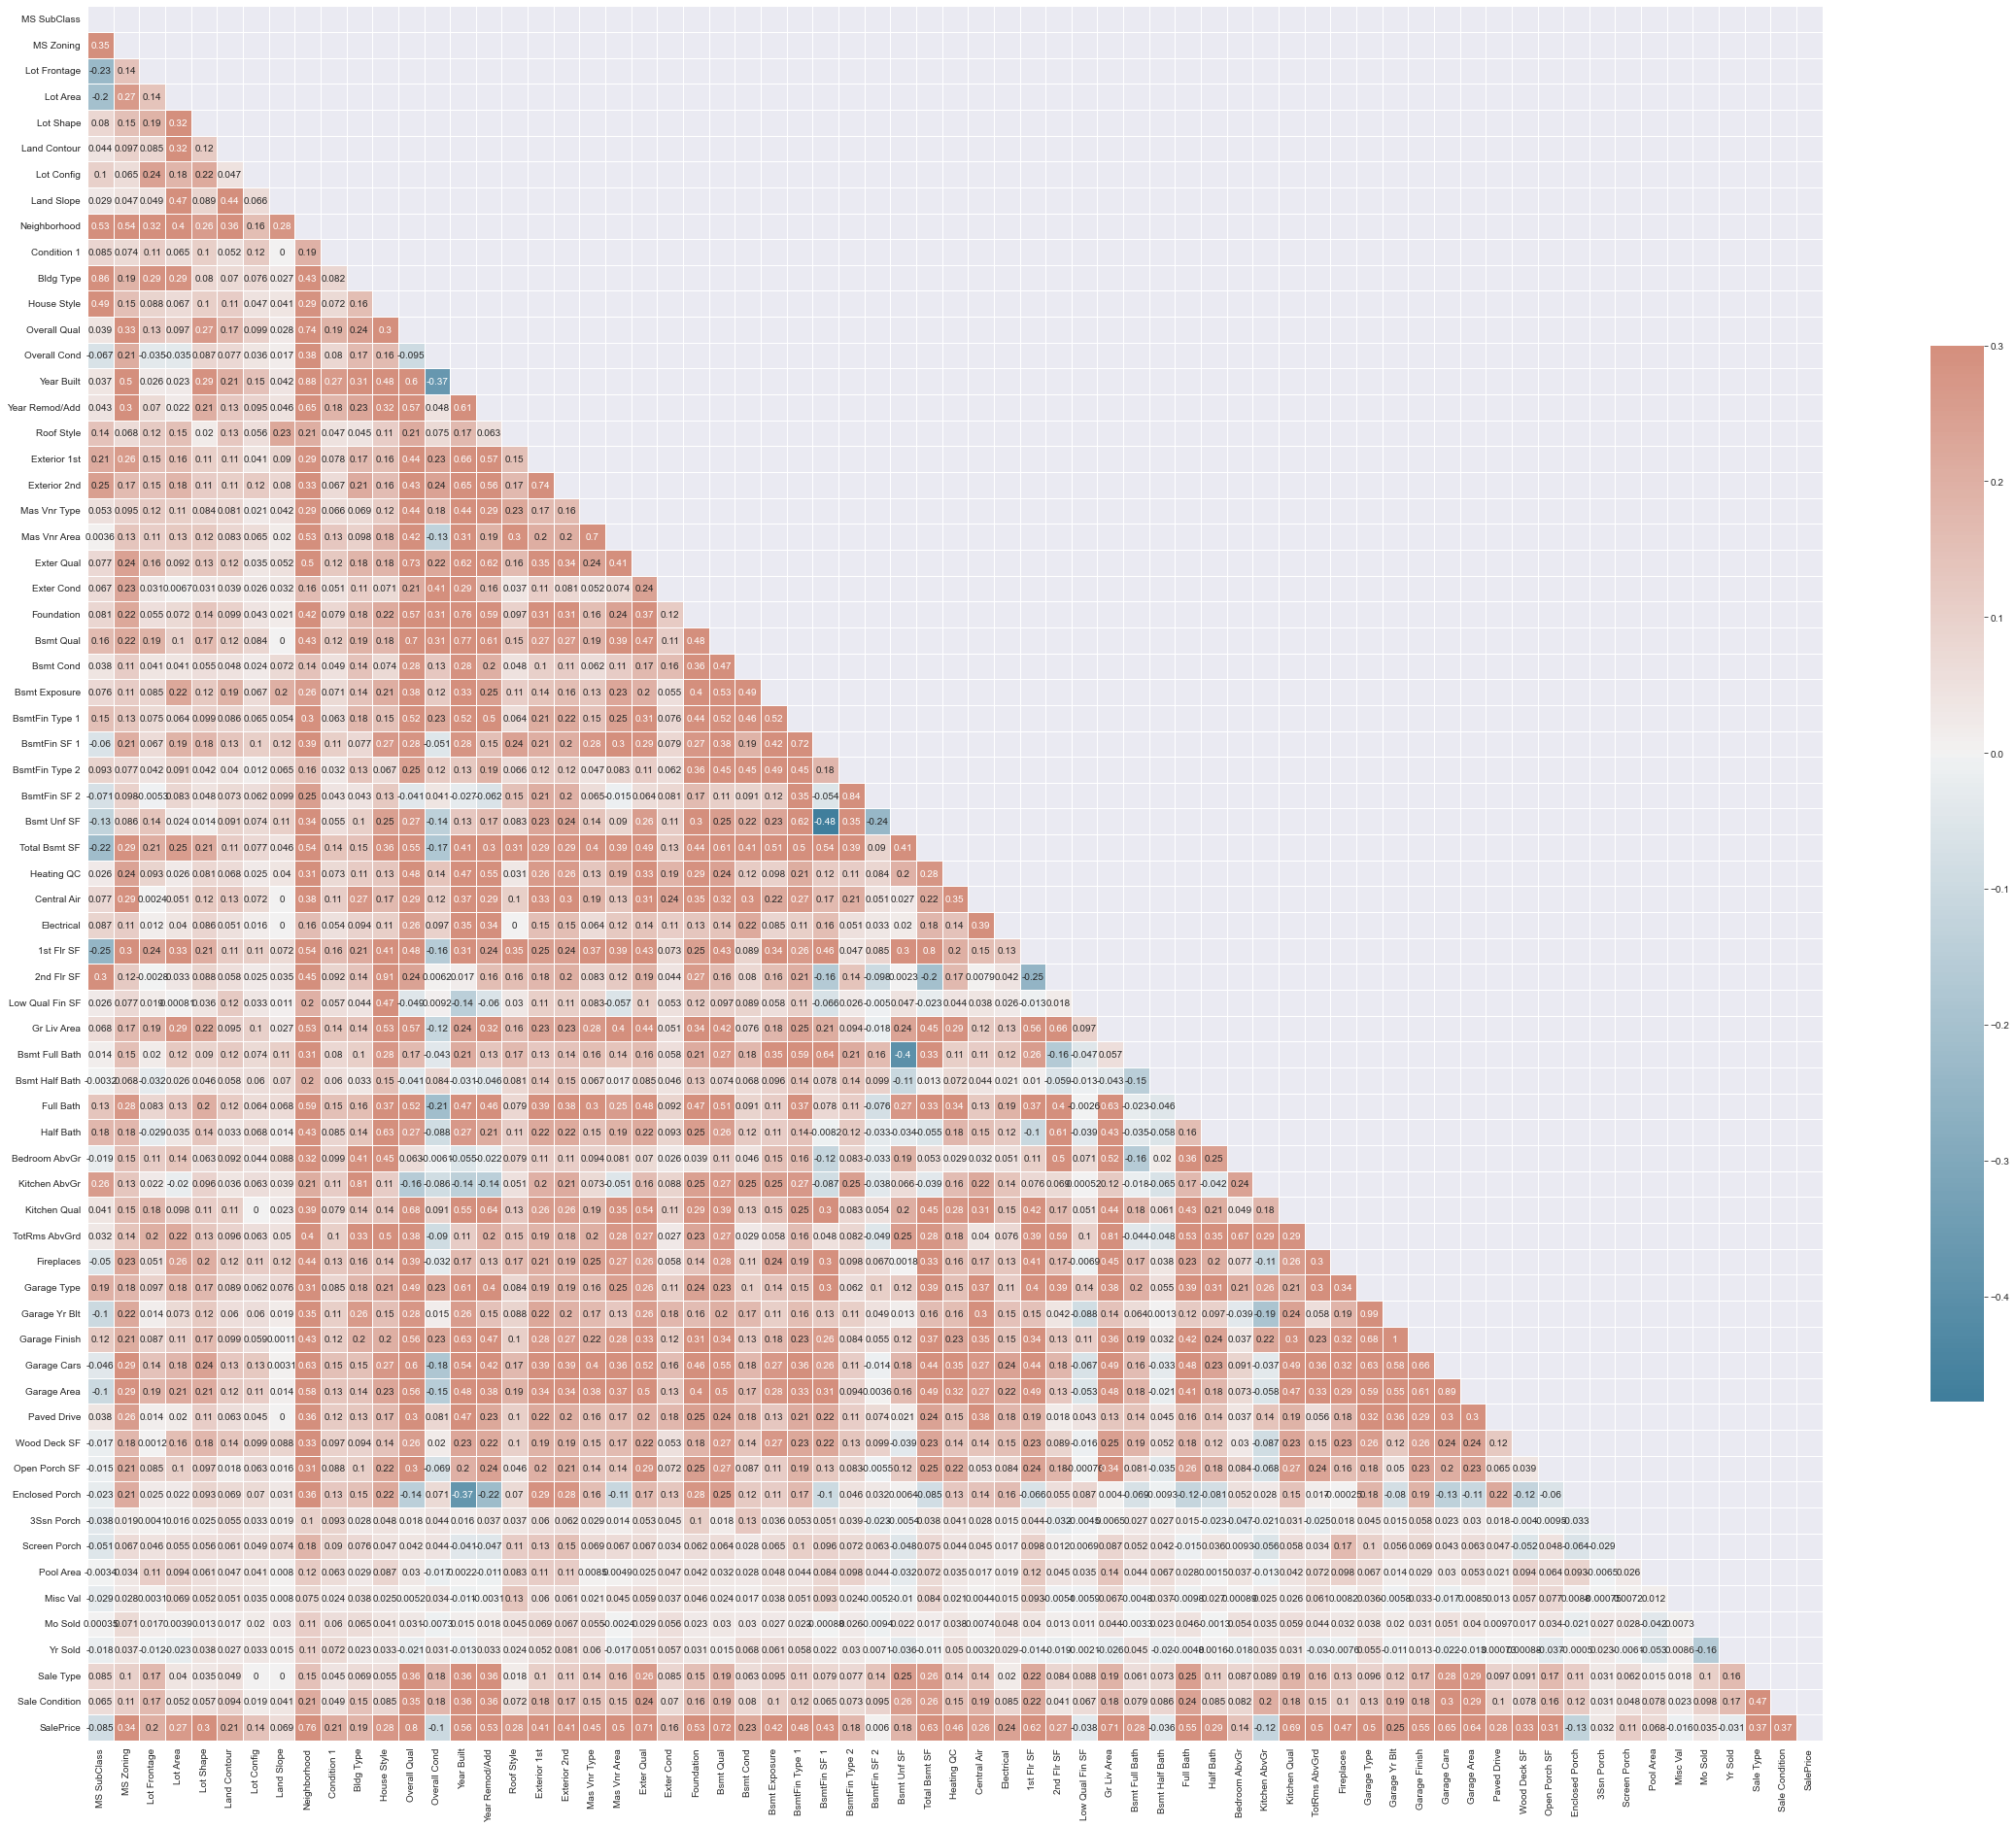

In [92]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

In [93]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3S

In [94]:
sub_selection = ['Neighborhood', 'Overall Qual', 'Year Built',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual',  'Garage Finish', 'Garage Cars',
       'Garage Area', 'SalePrice']

In [95]:
df_sub_selection = df[sub_selection]

<AxesSubplot:>

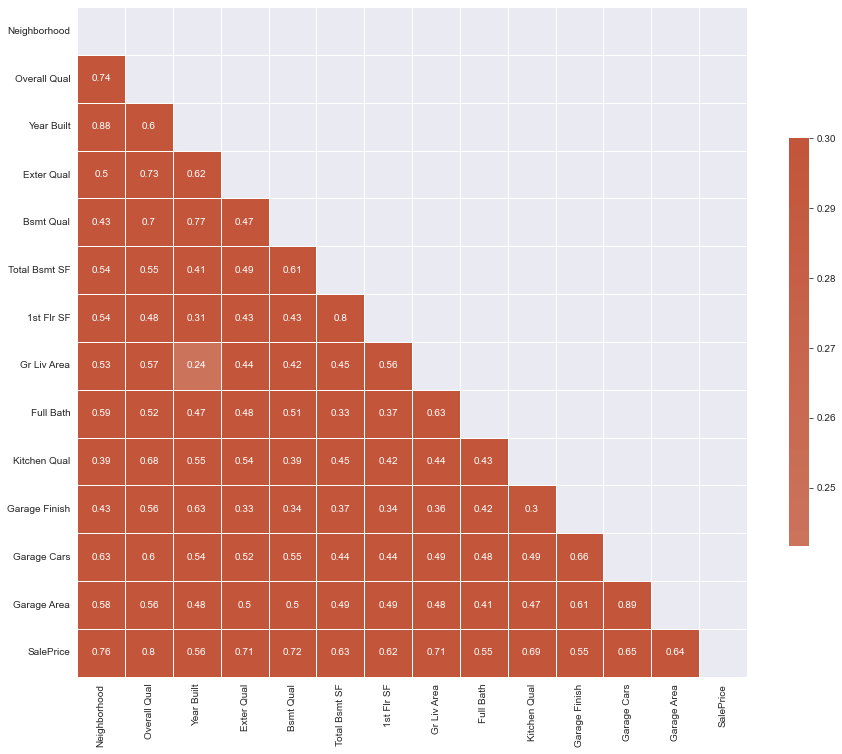

In [96]:
sub_correlation= associations(df_sub_selection,compute_only=True)
mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})


On voit que beaucoup de variables sont corrélées entre elles. On va s'orienter vers un modèle selectif pour pouvoir exclure les variables trop corrélées.

# Préparation des données en vue du modèle

In [97]:
num_selected = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "SalePrice"]
cat_num = ["Overall Qual", "Full Bath", "Garage Cars"]
cat_str = ["Neighborhood", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Finish"]

In [98]:
df[num_selected].isna().sum()

Year Built       0
Total Bsmt SF    1
1st Flr SF       0
Gr Liv Area      0
Garage Area      1
SalePrice        0
dtype: int64

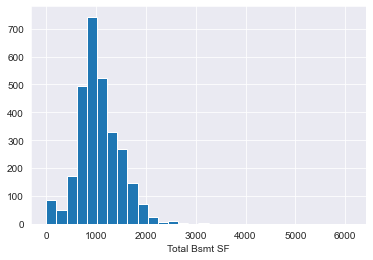

In [99]:
plt.figure()
plt.hist(x=df["Total Bsmt SF"], bins=30)
plt.xlabel("Total Bsmt SF")
plt.show()

In [100]:
df["Total Bsmt SF"].mean()

1051.6145442130419

In [101]:
df["Total Bsmt SF"].fillna(1052, inplace=True)

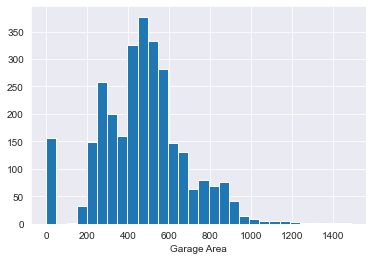

In [102]:
plt.figure()
plt.hist(x=df["Garage Area"], bins=30)
plt.xlabel("Garage Area")
plt.show()

In [103]:
df["Garage Area"].mean()

472.8197336975077

In [104]:
df["Garage Area"].fillna(472, inplace=True)

In [105]:
df[cat_num].isna().sum()

Overall Qual    0
Full Bath       0
Garage Cars     1
dtype: int64

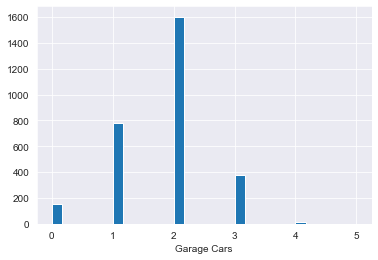

In [106]:
plt.figure()
plt.hist(x=df["Garage Cars"], bins=30)
plt.xlabel("Garage Cars")
plt.show()

In [107]:
df["Total Bsmt SF"].fillna(2, inplace=True)

In [108]:
df[cat_str].isna().sum()

Neighborhood       0
Exter Qual         0
Bsmt Qual         80
Kitchen Qual       0
Garage Finish    159
dtype: int64

In [109]:
df["Bsmt Qual"].value_counts()

TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [110]:
df["Bsmt Qual"].fillna("TA", inplace=True)

In [111]:
df["Garage Finish"].value_counts()

Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

<AxesSubplot:>

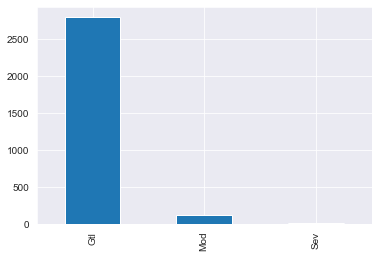

In [112]:
df["Land Slope"].value_counts().plot(kind='bar')

In [113]:
df["Bsmt Qual"].fillna("Unf", inplace=True)

# Pipeline et modèle

In [114]:
import pandas as pd
df = pd.read_csv("data/AmesHousing.csv")

Il ne faut selectionner que 10 features, on supprime Neighborhood qui est trop complexe à traiter, ainsi que bsmt Qual et garage Finish qui sont trop proches d'autres variables

In [115]:
numeric_features = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "Overall Qual", "Full Bath"]
ordinal_features = [ "Exter Qual",  "Kitchen Qual"]
cat_feature = ["Neighborhood"]
all_col = numeric_features.copy()
all_col.extend(ordinal_features)
all_col.extend(cat_feature)

X = df[all_col]
y = df[["SalePrice"]]

X["Total Bsmt SF"].fillna(1052, inplace=True)
X["Garage Area"].fillna(472, inplace=True)

c:\Users\Apprenant\anaconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [116]:
X.columns = ['Year_Built', 'Total_Bsmt_SF', '1st_Flr_SF', 'Gr_Liv_Area','Garage_Area', 'Overall_Qual', 'Full_Bath', 'Exter_Qual',
       'Kitchen_Qual', 'Neighborhood']

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder

numeric_transformer = SimpleImputer()

exter_cat = [ 'Po', 'Fa','TA', 'Gd','Ex']
kitchen_cat = [ 'Po', 'Fa','TA', 'Gd',"Ex"]

ordinal_transformer = OrdinalEncoder(categories=[exter_cat, kitchen_cat])

categorical_transformer = OneHotEncoder()



In [119]:
numeric_features = ["Year_Built", "Total_Bsmt_SF", "1st_Flr_SF", "Gr_Liv_Area", "Garage_Area", "Overall_Qual", "Full_Bath"]
ordinal_features = [ "Exter_Qual",  "Kitchen_Qual"]
cat_feature = ["Neighborhood"]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, cat_feature)
    ]
)

In [120]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [121]:
import numpy as np
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_absolute_error

pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('reg', reg)
])


pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Year_Built',
                                                   'Total_Bsmt_SF',
                                                   '1st_Flr_SF', 'Gr_Liv_Area',
                                                   'Garage_Area',
                                                   'Overall_Qual',
                                                   'Full_Bath']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
   

In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pipe.score(X_test,y_test)

predict_train  = pipe.predict(X_train)
predict_test  = pipe.predict(X_test)

# Root Mean Squared Error on train and test date
print('MAE on train data: ', mean_absolute_error(y_train, predict_train))
print('MAE on test data: ',  mean_absolute_error(y_test, predict_test))


print('MSE on train data: ', mean_squared_error(y_train, predict_train))
print('MSE on test data: ',  mean_squared_error(y_test, predict_test))

MAE on train data:  20265.291826238572
MAE on test data:  21262.46549196969
MSE on train data:  1007631457.2144834
MSE on test data:  1228965483.0179832


In [126]:
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(search, open(filename, 'wb'))